# Indicing Techniques

In [2]:
import rasterio

file_path = "S2_3-11-16_16PDC_11.tif"  # Replace with your file

with rasterio.open(file_path) as dataset:
    print(f"Number of Bands: {dataset.count}")


Number of Bands: 11


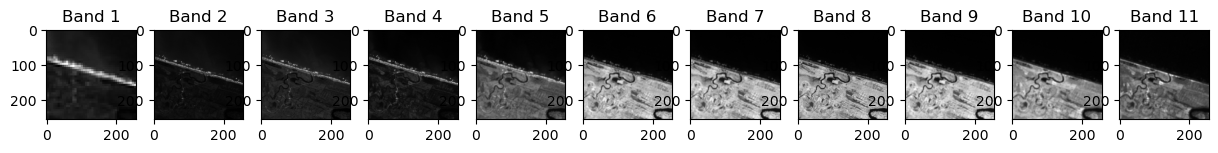

In [6]:
import matplotlib.pyplot as plt

with rasterio.open(file_path) as dataset:
    fig, axes = plt.subplots(1, dataset.count, figsize=(15, 5))
    for i in range(dataset.count):
        band = dataset.read(i + 1)
        axes[i].imshow(band, cmap="gray")
        axes[i].set_title(f"Band {i+1}")
    plt.show()


### NDVI


**Dataset Metadata:**
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 256, 'height': 256, 'count': 11, 'crs': CRS.from_epsg(32616), 'transform': Affine(10.0, 0.0, 472460.0,
       0.0, -10.0, 1749160.0)}

Number of Bands: 11


o:\anaconda\envs\cap2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


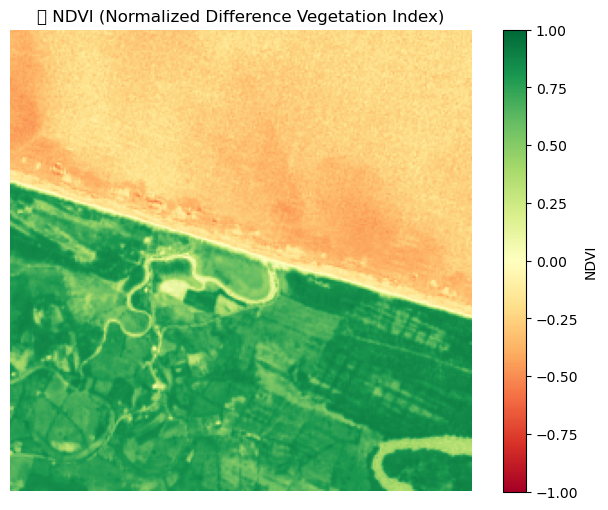

In [12]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Path to Sentinel-2 Image
file_path = "S2_3-11-16_16PDC_11.tif"  # Replace with your actual file path

# Open the dataset
with rasterio.open(file_path) as dataset:
    print("\n**Dataset Metadata:**")
    print(dataset.meta)
    print(f"\nNumber of Bands: {dataset.count}")
    
    # Read NIR (Band 8) and Red (Band 4)
    nir_band = 8   
    red_band = 4 

    nir = dataset.read(nir_band).astype(np.float32)  # Convert to float for calculations
    red = dataset.read(red_band).astype(np.float32)

    # Compute NDVI
    ndvi = (nir - red) / (nir + red + 1e-10)

    # Plot NDVI Image
    plt.figure(figsize=(8, 6))
    plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
    plt.colorbar(label="NDVI")
    plt.title("🌿 NDVI (Normalized Difference Vegetation Index)")
    plt.axis("off")
    plt.show()


In [18]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Sentinel-2 Band Wavelengths (in nm) based on the table
wavelengths = {
    "B4": 665,   # Red
    "B6": 740.5, # Red Edge 2
    "B8": 832.8, # NIR
    "B11": 1613.7 # SWIR1
}

# Path to Sentinel-2 Image
file_path = "S2_3-11-16_16PDC_11.tif"  # Replace with actual file path
output_path = "FDI_Output.tif"  # Output file

# Open the dataset
with rasterio.open(file_path) as dataset:
    print("\n**Dataset Metadata:**")
    print(dataset.meta)
    print(f"\nNumber of Bands: {dataset.count}")

    # Read required bands
    nir = dataset.read(8).astype(np.float32)   # Band 8 (NIR)
    red = dataset.read(4).astype(np.float32)   # Band 4 (Red)
    red_edge2 = dataset.read(6).astype(np.float32)  # Band 6 (Red Edge 2)
    swir1 = dataset.read(10).astype(np.float32) # Band 11 (SWIR1)

    # Compute I8'
    I8_prime = red_edge2 + (swir1 - red_edge2) * ((wavelengths["B8"] - wavelengths["B4"]) / 
                                                  (wavelengths["B8"] + wavelengths["B4"])) * 10

    # Compute FDI
    fdi = nir - I8_prime

    fdi_rescaled = (255 * (fdi - np.min(fdi)) / (np.max(fdi) - np.min(fdi))).astype(np.uint8)

    # Save the FDI image with original georeferencing
    profile = dataset.profile
    profile.update(dtype=rasterio.uint8, count=1)

    with rasterio.open(output_path, "w", **profile) as dst:
        dst.write(fdi_rescaled, 1)

print(f"FDI image saved as {output_path}")


**Dataset Metadata:**
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 256, 'height': 256, 'count': 11, 'crs': CRS.from_epsg(32616), 'transform': Affine(10.0, 0.0, 472460.0,
       0.0, -10.0, 1749160.0)}

Number of Bands: 11
FDI image saved as FDI_Output.tif


In [17]:
import rasterio

file_path = "S2_3-11-16_16PDC_11.tif"  # Replace with actual file path

with rasterio.open(file_path) as dataset:
    print(f"Number of bands: {dataset.count}")
    
    try:
        dataset.read(1)
        print("Bands are indexed from 1.")
    except:
        print("Bands are indexed from 0.")


Number of bands: 11
Bands are indexed from 1.
